In [ ]:
import gym
import numpy as np
import time

In [ ]:
env = gym.make('FrozenLake-v1', new_step_api=True)
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [ ]:
env.reset()

0

In [ ]:
Q = np.zeros((STATES, ACTIONS))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
  EPISODES = 10000
  MAX_STEPS = 100

  LEARNING_RATE = 0.81
  GAMMA = 0.96

In [ ]:
epsilon = 0.9

if np.random.uniform(0, 1) < epsilon:
  action = env.action_space.sample()
else:
  action = np.argmax(Q[state, :])

In [ ]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: ignored

In [ ]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500
MAX_STEPS = 100

LEARNING_RATE = 0.81
GAMMA = 0.96

RENDER = False

epsilon = 0.9

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
rewards = []
for episodes in range(EPISODES):

    state = env.reset()
    for _ in range(MAX_STEPS):
      
      if RENDER:
        env.render()

      if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
      else:
        action = np.argmax(Q[state, :])

      next_state, reward, done, _ = env.step(action)

      Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

      state = next_state

      if done:
        rewards.append(reward)
        epsilon -= 0.001
        break # goal reached

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}")

[[2.17011003e-01 1.31075619e-02 1.71021841e-02 1.68232248e-02]
 [4.28269043e-03 2.12260131e-03 2.30355170e-03 2.87332363e-01]
 [6.45361860e-03 6.09090275e-03 4.50561458e-03 2.98078026e-01]
 [1.91085421e-03 2.94380732e-03 5.34412328e-03 1.08709338e-01]
 [6.08544123e-01 9.91570441e-03 1.44352396e-02 5.77664211e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.57168122e-04 3.39875249e-05 8.12381539e-05 1.01547968e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.40033698e-03 1.71072147e-02 1.55784594e-02 8.30200377e-01]
 [6.92637569e-03 4.48348809e-01 4.72652680e-03 4.63941056e-03]
 [9.43874806e-02 4.91271329e-03 5.26696978e-03 6.29529540e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.03466956e-02 2.91640949e-02 3.43002981e-01 2.57910002e-02]
 [1.12975998e-01 6.57231364e-01 1.75296251e-01 2.06913959e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

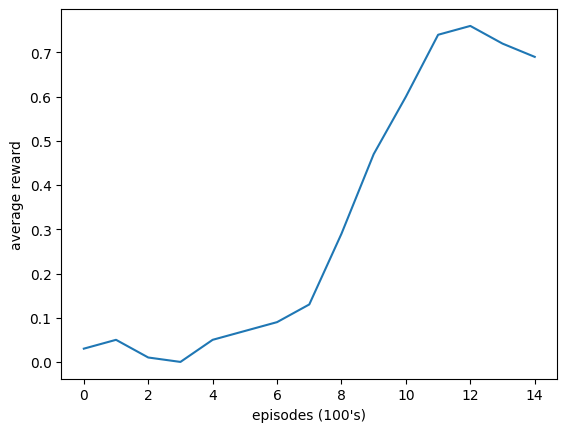

In [ ]:
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show();